In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import pylab as pl
import requests
import json

In [2]:
#import data found in https://www.kaggle.com/nickhould/craft-cans
beer_df = pd.read_csv('Resource/beers.csv')
breweries_df = pd.read_csv('Resource/breweries.csv')
beer_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [3]:
# Remove the ibu Column
beer_df = beer_df[['id','name','abv','style','brewery_id']]
beer_df.head()
beer_df.info()
# There are 2410 beers in this list. We need to clean the data and remove the blank data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 5 columns):
id            2410 non-null int64
name          2410 non-null object
abv           2348 non-null float64
style         2405 non-null object
brewery_id    2410 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 94.2+ KB


In [4]:
beer_df.head()

,id,name,abv,style,brewery_id
0,1436,Pub Beer,0.050,American Pale Lager,408
1,2265,Devil's Cup,0.066,American Pale Ale (APA),177
2,2264,Rise of the Phoenix,0.071,American IPA,177
3,2263,Sinister,0.090,American Double / Imperial IPA,177
4,2262,Sex and Candy,0.075,American IPA,177


In [5]:
beer_df = beer_df.dropna(axis=0, how='any')
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 0 to 2409
Data columns (total 5 columns):
id            2346 non-null int64
name          2346 non-null object
abv           2346 non-null float64
style         2346 non-null object
brewery_id    2346 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 110.0+ KB


In [6]:
beer_styles = beer_df['style'].value_counts()
beer_styles.head()

American IPA                      417
American Pale Ale (APA)           239
American Amber / Red Ale          125
American Blonde Ale               104
American Double / Imperial IPA    103
Name: style, dtype: int64

In [7]:
unique_style_df = pd.DataFrame(beer_df['style'].unique())
unique_style_df.head()

,0
0,American Pale Lager
1,American Pale Ale (APA)
2,American IPA
3,American Double / Imperial IPA
4,Oatmeal Stout


In [8]:
#clean data RE:breweries.csv
#rename unamed column to be able to merge data
breweries_df = breweries_df.rename(columns = {'Unnamed: 0':'brewery_id'})
breweries_df.info()
#there are 558 different breweries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 4 columns):
brewery_id    557 non-null int64
name          557 non-null object
city          557 non-null object
state         557 non-null object
dtypes: int64(1), object(3)
memory usage: 17.5+ KB


In [9]:
#find brewery count by city
group = pd.DataFrame(breweries_df.groupby(['state'])['city'].count())
group_sort = group.sort_values(by='city',ascending=False)
group_sort

,city
state,
CO,46
CA,39
MI,32
OR,29
TX,28
PA,25
WA,23
MA,23
IN,22


In [28]:
#merge data to beers
merge = pd.merge(breweries_df,beer_df,on='brewery_id',suffixes=('_brewery','_beer'))
merge.head()

,brewery_id,name_brewery,city,state,id,name_beer,abv,style
0,0,NorthGate Brewing,Minneapolis,MN,2692,Get Together,0.045,American IPA
1,0,NorthGate Brewing,Minneapolis,MN,2691,Maggie's Leap,0.049,Milk / Sweet Stout
2,0,NorthGate Brewing,Minneapolis,MN,2690,Wall's End,0.048,English Brown Ale
3,0,NorthGate Brewing,Minneapolis,MN,2689,Pumpion,0.060,Pumpkin Ale
4,0,NorthGate Brewing,Minneapolis,MN,2688,Stronghold,0.060,American Porter


In [11]:
## Make ABV a percentage for readability in the plots
merge['abv'] = merge['abv']*100

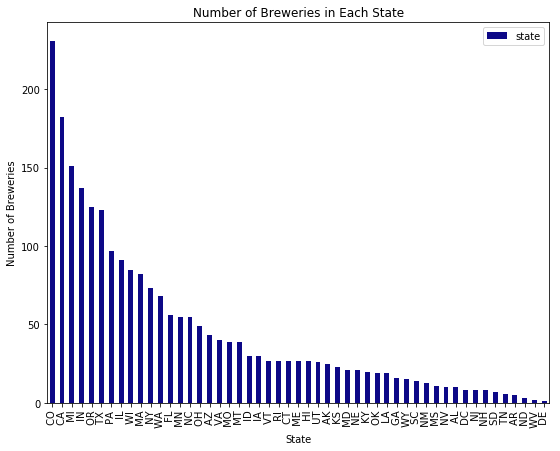

In [22]:
# Number of Breweries in each state/ Top 10
plot = merge.state.value_counts().plot(kind='bar', title="Number of Breweries in Each State", \
                             figsize=(9,7), colormap='plasma')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

plt.legend()
plt.savefig('state.png')

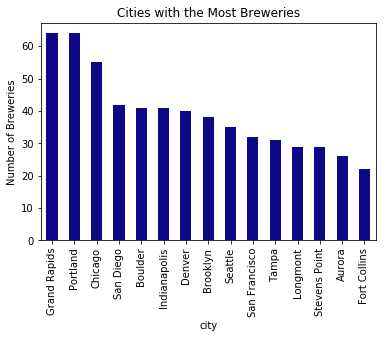

In [23]:
plot_2 = merge.groupby('city')['name_brewery'].count().nlargest(15).plot(kind='bar', \
               title='Cities with the Most Breweries', \
               colormap='plasma',  )
plot_2.set_ylabel('Number of Breweries')
plt.savefig('Cities.png')

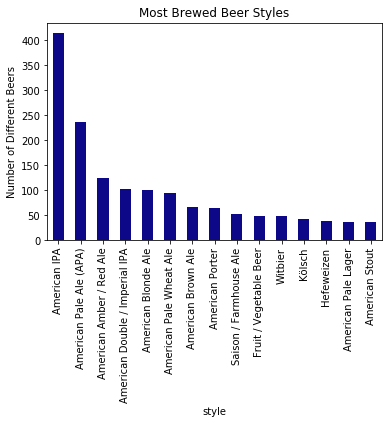

In [24]:
plot_3 = merge.groupby('style')['name_beer'].count().nlargest(15).plot(kind='bar', \
               title='Most Brewed Beer Styles', \
               colormap='plasma',  )

plot_3.set_ylabel('Number of Different Beers')
plt.savefig('styles.png')

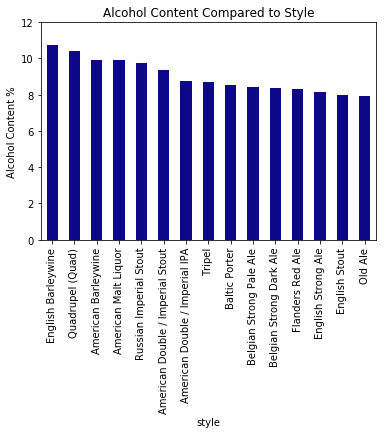

In [25]:
plot_4 = merge.groupby('style')['abv'].mean().nlargest(15).plot(kind='bar', \
               title='Alcohol Content Compared to Style', \
               colormap='plasma', )
plt.ylim(top=12)
                                                               

plot_4.set_ylabel('Alcohol Content %')
plt.savefig('Content.png')

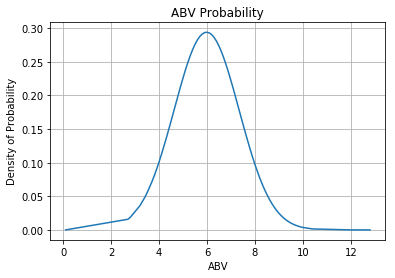

In [26]:
merge
abvs = merge['abv']
arr = []
for x in abvs:
    arr.append(x)
arr.sort()
hmean = np.mean(arr)
hstd = np.std(arr)
pdf = stats.norm.pdf(arr, hmean, hstd)
plt.grid()
plt.xlabel('ABV')
plt.title("ABV Probability")
plt.ylabel('Density of Probability')
plt.plot(arr, pdf)




plt.savefig('probablity.png')


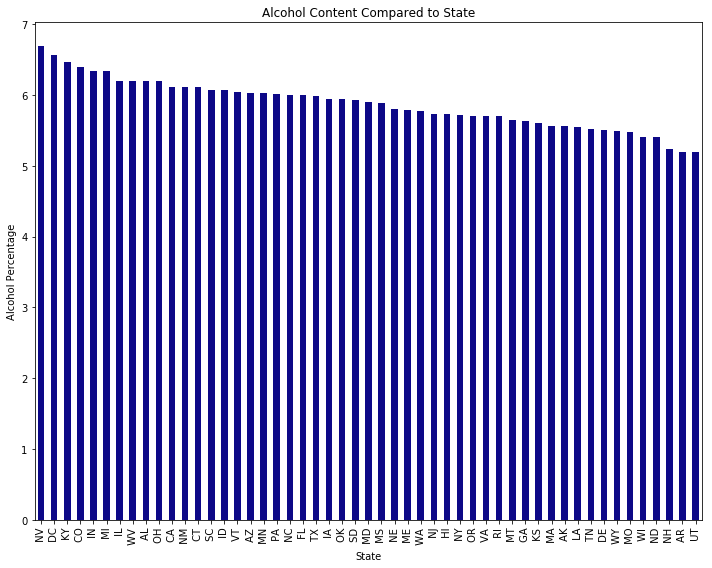

In [27]:
plot_5 = merge.groupby('state')['abv'].mean().sort_values(ascending=False)
plot_5.plot(kind='bar', \
               title='Alcohol Content Compared to State', \
               colormap='plasma',       figsize=(10,8))
plt.ylabel('Alcohol Percentage')
plt.xlabel('State')
plt.tight_layout()
plt.savefig('alcohol_compared.png')